In [1]:
# Uncomment the lines below to install the packages as required
!pip install iexfinance
!pip install pandas
!pip install matplotlib
!pip install gensim
!pip install pyLDAvis
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hshah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hshah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hshah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hshah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hshah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [2]:
import requests, json, re
import pandas as pd
import matplotlib
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from datetime import datetime
from iexfinance.stocks import get_historical_data

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation) 

def text_cleanup(input_text):
    one = " ".join([i for i in input_text.lower().split() if i not in stopwords])
    two = "".join(re.sub(r'[^a-zA-Z ]', '', i) for i in one if i not in punctuation)
    three = [WordNetLemmatizer().lemmatize(i) for i in two.split()]
    return three

In [3]:
json_data=open("C:/Users/hshah/OneDrive - Paycor, Inc/Documents/Anly 610/Result_Deduplicated.json").readlines()
import json
feeds_read_from_file = []
for line in json_data:
    feeds_read_from_file.append(json.loads(line))
print(len(feeds_read_from_file)) 

5023


In [4]:
df_feeds = pd.DataFrame(feeds_read_from_file[1:],columns=feeds_read_from_file[0])
df_feeds['title']

0       Apple's 2020 iPad Pro has a hardware microphon...
1                         Avisering från Google – youtube
2       Macbook Air 13 Skin template for cutting or ma...
3                                    Google Alert - watch
4       Senators question Tim Cook about the privacy o...
                              ...                        
5017    cervinesatyr:Problem solving: no characters ha...
5018    Chris Evans and his beard are here to help us ...
5019    BMW may be first automaker to get Apple CarKey...
5020    Al Roker uses Apple MacBook Pro, iPhones, and ...
5021    Comment: Expanded mouse support will go a long...
Name: title, Length: 5022, dtype: object

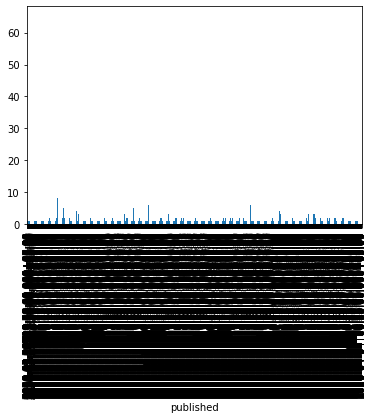

In [5]:
df_daily_count = df_feeds.groupby('published')['title'].count()
df_daily_count.plot(kind='bar', x='published')

In [10]:
from gensim.models import ldamodel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim
import os

titles = df_feeds[['title']].applymap(text_cleanup)['title']
dictionary = Dictionary(titles)
dictionary.filter_extremes(no_below=15, no_above=0.2)
corpora = [dictionary.doc2bow(doc) for doc in titles]

# Running and Trainign LDA model on the document term matrix.
lda_model = ldamodel.LdaModel(corpora, num_topics=10, id2word = dictionary, passes=50)
#Output showing set of 10 topic clusters with up to 10 keywords per cluster
'''
You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics().

Interpretation of the code:
Topic 3 is a represented as ''0.170*"iphone" + 0.089*"new" + 0.052*"launch" + 0.052*"april" + '
  '0.040*"release" + 0.035*"could" + 0.031*"feature" + 0.031*"se" + '
  '0.024*"price" + 0.022*"io"
It tell us that the 10 keywords which contribute to this topic are: ‘iphone’, ‘new’, ‘launch’,etc.. and so on and the weight of ‘iphone’ on topic 3 is 0.170.

The weights reflect how important a keyword is to that topic.Looking at these keywords,we can guess what topic is

Similarly, we can go through the remaining topic keywords and do a guesswork what the topic would be.
'''
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpora]

[(0,
  '0.076*"video" + 0.071*"io" + 0.061*"app" + 0.061*"amazon" + 0.041*"v" + '
  '0.033*"apps" + 0.029*"update" + 0.025*"window" + 0.024*"new" + '
  '0.024*"zoom"'),
 (1,
  '0.088*"covid" + 0.076*"coronavirus" + 0.037*"u" + 0.035*"store" + '
  '0.035*"podcast" + 0.034*"app" + 0.027*"product" + 0.026*"work" + '
  '0.021*"new" + 0.021*"march"'),
 (2,
  '0.093*"free" + 0.042*"online" + 0.037*"show" + 0.037*"know" + '
  '0.036*"service" + 0.028*"mp" + 0.027*"movie" + 0.026*"cut" + '
  '0.026*"streaming" + 0.024*"support"'),
 (3,
  '0.170*"iphone" + 0.089*"new" + 0.052*"launch" + 0.052*"april" + '
  '0.040*"release" + 0.035*"could" + 0.031*"feature" + 0.031*"se" + '
  '0.024*"price" + 0.022*"io"'),
 (4,
  '0.079*"android" + 0.073*"dark" + 0.053*"sky" + 0.044*"g" + 0.041*"time" + '
  '0.040*"still" + 0.039*"app" + 0.037*"fall" + 0.036*"home" + '
  '0.034*"weather"'),
 (5,
  '0.118*"pro" + 0.083*"ipad" + 0.070*"macbook" + 0.052*"gb" + 0.048*"review" '
  '+ 0.047*"google" + 0.043*"air" + 0.

In [11]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpora, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.055192 -0.154720       1        1  14.872271
1      0.236026  0.075727       2        1  12.030885
0      0.094139 -0.035081       3        1  10.581893
2     -0.132399  0.182213       4        1   9.813101
9      0.096078  0.195275       5        1   9.156256
7      0.005376 -0.141340       6        1   9.081701
5     -0.256299 -0.121487       7        1   8.994875
6     -0.099084 -0.225113       8        1   8.764974
4      0.204393 -0.018825       9        1   8.596146
8     -0.203422  0.243352      10        1   8.107912, topic_info=        Term        Freq       Total Category  logprob  loglift
23    iphone  605.000000  605.000000  Default  30.0000  30.0000
31        tv  243.000000  243.000000  Default  29.0000  29.0000
2        pro  265.000000  265.000000  Default  28.0000  28.0000
59      best  189.000000  189.000000  Default  27.0000  27.0000
13     covid  195.000000  195.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
6    digital   37.116035   42.057243  Topic10  -3.6983   2.3873
138    first   41.121712   68.694427  Topic10  -3.5958   1.9992
319     play   24.371222   33.440010  Topic10  -4.1189   2.1960
270     film   18.758690   27.532814  Topic10  -4.3807   2.1286
3     google   23.280933  124.442719  Topic10  -4.1647   0.8361

[430 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
36        7  0.981916         a
331       5  0.942543      aapl
300       2  0.296116    access
300       9  0.651454    access
45        9  0.959906  acquires
...     ...       ...       ...
142       4  0.213965      year
142       6  0.213965      year
142       7  0.546799      year
4         5  0.975085   youtube
110       3  0.991988      zoom

[525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 10, 8, 6, 7, 5, 9])